In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
ga_model_old =pd.read_csv("../data/models/goals_assists/versions/v1/goals_assists_predictions.csv", usecols = ["season","gw_orig","date_played","player_id","team_id","player","pos","venue","minutes","pred_minutes","goals_true","assists_true","pred_goals_p90_mean","pred_assists_p90_mean","pred_goals_mean","pred_assists_mean","p_goal","p_assist","p_return_any"])
ga_model_new =pd.read_csv("../data/models/goals_assists/versions/v2/goals_assists_predictions.csv", usecols = ["season","gw_orig","date_played","player_id","team_id","player","pos","venue","minutes","pred_minutes","goals_true","assists_true","pred_goals_p90_mean","pred_assists_p90_mean","pred_goals_mean","pred_assists_mean","p_goal","p_assist","p_return_any"])
ga_forecast = pd.read_csv("../data/predictions/goals_assists/2025-2026/GW4_6.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","pred_minutes","pred_goals_mean","pred_assists_mean","pred_goals_p90_mean","pred_assists_p90_mean","pred_goals_p90_poisson","pred_assists_p90_poisson","pred_goals_poisson","pred_assists_poisson","p_goal","p_assist","p_return_any"])

FileNotFoundError: [Errno 2] No such file or directory: '../data/models/goals_assists/versions/v2/goals_assists_predictions.csv'

In [ ]:
display(ga_model_old.head(10).sort_values(["gw_orig", "p_return_any"], ascending=[True, False]))

,season,gw_orig,date_played,player_id,team_id,player,pos,venue,minutes,pred_minutes,goals_true,assists_true,pred_goals_p90_mean,pred_assists_p90_mean,pred_goals_mean,pred_assists_mean,p_goal,p_assist,p_return_any
3,2024-2025,30,2025-04-01,06ab6f9c,1dd1f33c,Martin Ødegaard,MID,Home,90,82.946443,0.0,0.0,0.207289,0.269087,0.191043,0.247998,0.098185,0.088548,0.178039
5,2024-2025,30,2025-04-01,0c0888ab,767ff900,Bruno Fernandes,MID,Away,90,83.428410,0.0,0.0,0.284675,0.209659,0.263888,0.194351,0.098185,0.088548,0.178039
8,2024-2025,30,2025-04-01,1705773c,223048dd,Jean-Ricner Bellegarde,MID,Home,89,49.805725,0.0,0.0,0.392134,0.188598,0.217006,0.104369,0.078431,0.066667,0.139869
1,2024-2025,30,2025-04-01,01757724,767ff900,Manuel Ugarte Ribeiro,MID,Away,45,75.627431,0.0,0.0,0.103418,0.000000,0.086903,0.000000,0.057471,0.059091,0.113166
6,2024-2025,30,2025-04-01,0c0977e8,7fb5d771,Lucas Paquetá,MID,Away,90,56.988270,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.057471,0.059091,0.113166
0,2024-2025,30,2025-04-01,013748b6,223048dd,Nélson Semedo,DEF,Home,90,60.512938,0.0,0.0,0.023955,0.000000,0.016107,0.000000,0.038085,0.046784,0.083087
7,2024-2025,30,2025-04-01,0e61bed4,7fb5d771,Aaron Wan-Bissaka,DEF,Away,90,86.574628,0.0,0.0,0.001439,0.151828,0.001384,0.146049,0.032520,0.046784,0.077783
9,2024-2025,30,2025-04-01,1f06c493,03a0d347,Nikola Milenković,DEF,Home,90,81.709225,0.0,0.0,0.151983,0.000000,0.137983,0.000000,0.038085,0.027778,0.064805
4,2024-2025,30,2025-04-01,0ab74dfd,1dd1f33c,Jakub Kiwior,DEF,Home,75,50.895133,0.0,0.0,0.056805,0.089080,0.032123,0.050375,0.038085,0.026316,0.063398
2,2024-2025,30,2025-04-01,0618feac,049e06ec,Ryan Sessegnon,DEF,Away,14,26.591802,0.0,1.0,2.242973,1.749278,0.662719,0.516850,0.000000,0.000000,0.000000


In [ ]:
forwards = ga_forecast[ga_forecast["pos"] == "FWD"].head(10)
midfielders = ga_forecast[ga_forecast["pos"] == "MID"]
defenders = ga_forecast[ga_forecast["pos"] == "DEF"]


In [ ]:
display(forwards.head(10))

,season,gw_orig,date_sched,team_id,player_id,player,pos,pred_minutes,pred_goals_p90_mean,pred_assists_p90_mean,pred_goals_mean,pred_assists_mean,pred_goals_p90_poisson,pred_assists_p90_poisson,pred_goals_poisson,pred_assists_poisson,p_goal,p_assist,p_return_any
7,2025-2026,4,2025-09-12,03a0d347,525f0eeb,Igor Jesus,FWD,1.295177e-14,1.764157,0.644435,2.538772e-16,9.273967e-17,0.402333,0.192467,5.789910e-17,2.769765e-17,0.028571,0.007634,0.035987
9,2025-2026,4,2025-09-12,03a0d347,53989a8c,Chris Wood,FWD,8.068053e+01,0.288924,0.561592,2.590059e-01,5.034395e-01,0.348154,0.119454,3.121031e-01,1.070843e-01,0.192308,0.086207,0.261936
13,2025-2026,4,2025-09-12,03a0d347,70401549,Taiwo Awoniyi,FWD,2.110244e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.337482,0.126843,7.912987e-02,2.974119e-02,0.066667,0.018987,0.084388
28,2025-2026,4,2025-09-12,049e06ec,6a6589fd,Raúl Jiménez,FWD,2.161340e+01,0.229538,1.050853,5.512329e-02,2.523611e-01,0.405935,0.203263,9.748490e-02,4.881328e-02,0.079365,0.044776,0.120588
37,2025-2026,4,2025-09-12,049e06ec,bc2fcd3d,Rodrigo Muniz,FWD,3.201465e+01,0.621342,0.293755,2.210227e-01,1.044939e-01,0.400966,0.141500,1.426308e-01,5.033424e-02,0.109195,0.044776,0.149082
40,2025-2026,4,2025-09-12,049e06ec,fab24f32,Joshua King,FWD,7.117863e+01,1.548442,0.000000,1.224622e+00,0.000000e+00,0.353266,0.202394,2.793892e-01,1.600678e-01,0.109195,0.101562,0.199668
42,2025-2026,4,2025-09-12,1464d629,060b81bd,Liam Delap,FWD,2.469745e+01,1.567824,0.000000,4.302362e-01,0.000000e+00,0.452954,0.145000,1.242979e-01,3.979033e-02,0.079365,0.018987,0.096845
55,2025-2026,4,2025-09-12,1464d629,9ba7a3af,João Pedro,FWD,7.719066e+01,0.000000,0.217097,0.000000e+00,1.861983e-01,0.420485,0.145731,3.606392e-01,1.249893e-01,0.323529,0.101562,0.392233
66,2025-2026,4,2025-09-12,1dd1f33c,4ec0f1ba,Viktor Gyökeres,FWD,7.576218e+01,0.516893,0.010453,4.351213e-01,8.799551e-03,0.475274,0.216980,4.000867e-01,1.826546e-01,0.382222,0.163934,0.483497
81,2025-2026,4,2025-09-12,1dd1f33c,e8220773,Kai Havertz,FWD,1.744254e-14,0.817028,0.000000,1.583450e-16,0.000000e+00,0.506760,0.320313,9.821307e-17,6.207859e-17,0.028571,0.007634,0.035987


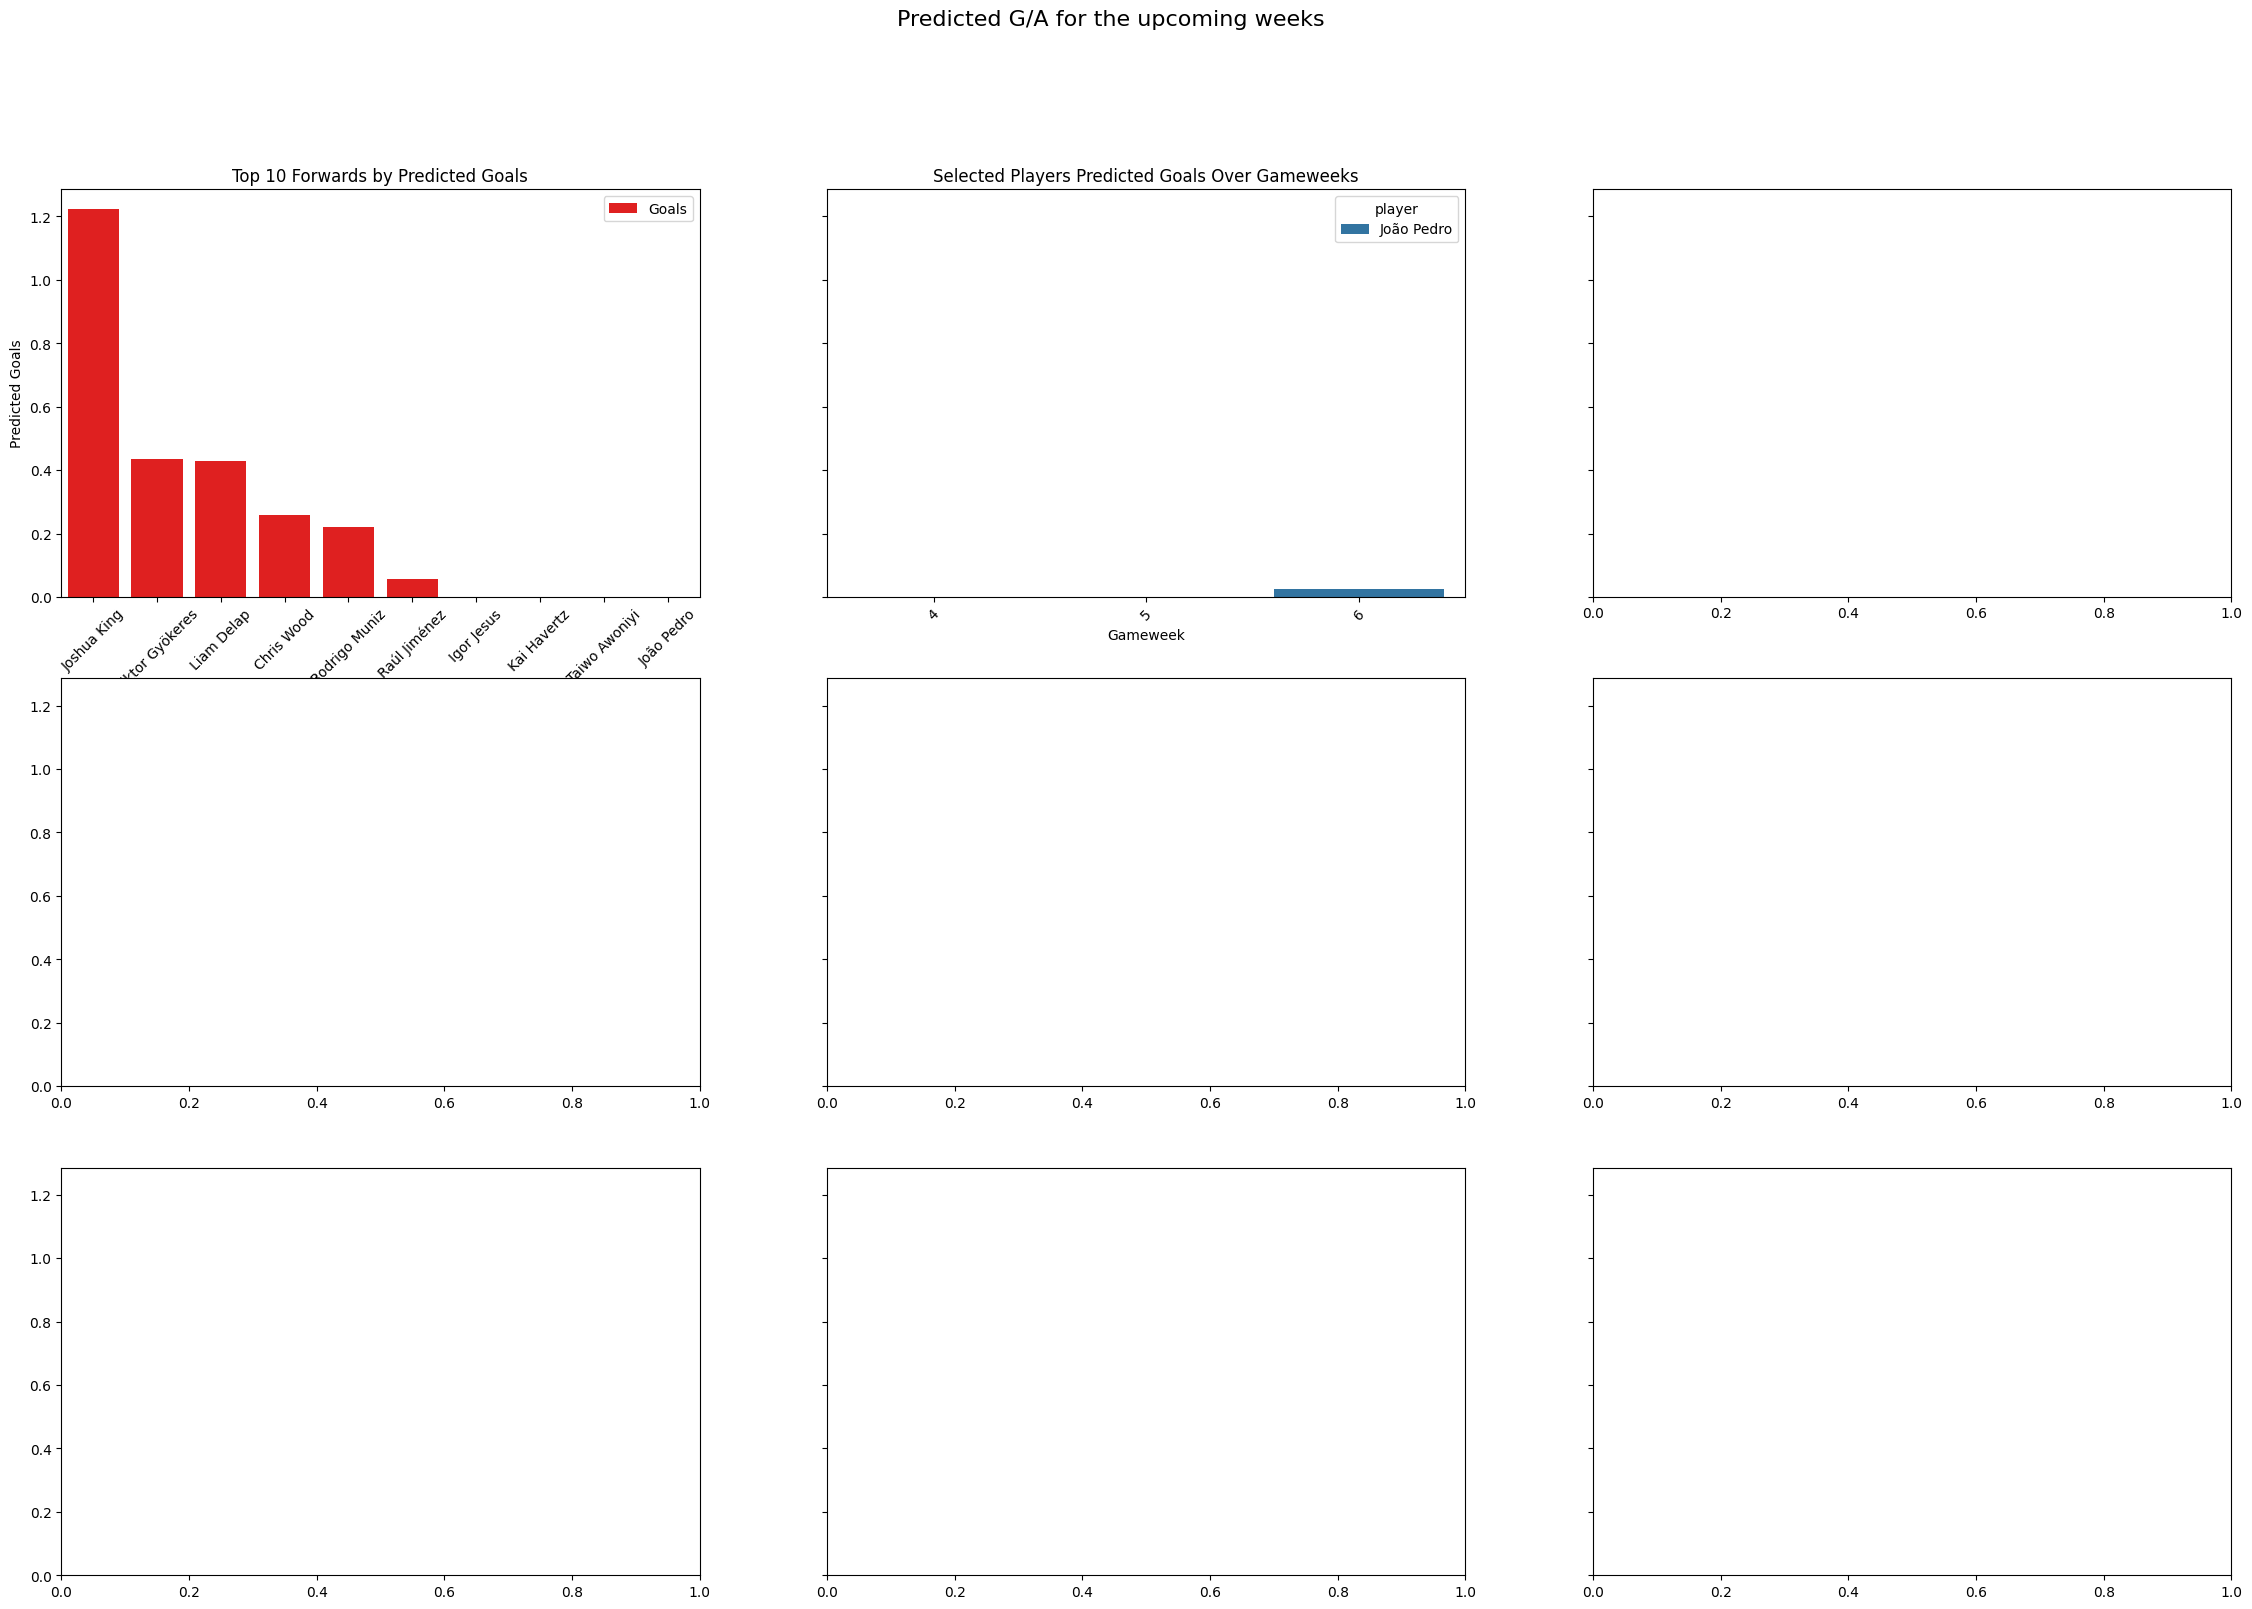

In [ ]:

fig, axes = plt.subplots(3,3, figsize=(28, 18), sharey=True)
fig.suptitle("Predicted G/A for the upcoming weeks", fontsize=16)

#Top 10 forwards by predicted goals for gameweek 4
sns.barplot(
	ax=axes[0,0],
	data=forwards,
	x="player",
	y="pred_goals_mean",
	color="red",
	label="Goals",
	errorbar=None,
	order=forwards.sort_values("pred_goals_mean", ascending=False).player
)
axes[0,0].set_title("Top 10 Forwards by Predicted Goals")
axes[0,0].set_ylabel("Predicted Goals")
axes[0,0].set_xlabel("Player")
axes[0,0].tick_params(axis='x', rotation=45)


# Selected players' predicted goals across gameweeks
players = ["João Pedro"]
# filter the dataframe (must be a DataFrame, not a boolean Series)
player_stats = ga_forecast[ga_forecast["player"].isin(players)]

# show multiple players across gameweeks with hue; set errorbar=None to avoid aggregation confidence intervals
sns.barplot(
	ax=axes[0,1],
	data=player_stats,
	x="gw_orig",
	y="pred_goals_mean",
	hue="player",
	errorbar=None
)
axes[0,1].set_title("Selected Players Predicted Goals Over Gameweeks")
axes[0,1].set_xlabel("Gameweek")
axes[0,1].set_ylabel("Predicted Goals")
axes[0,1].tick_params(axis='x', rotation=45)

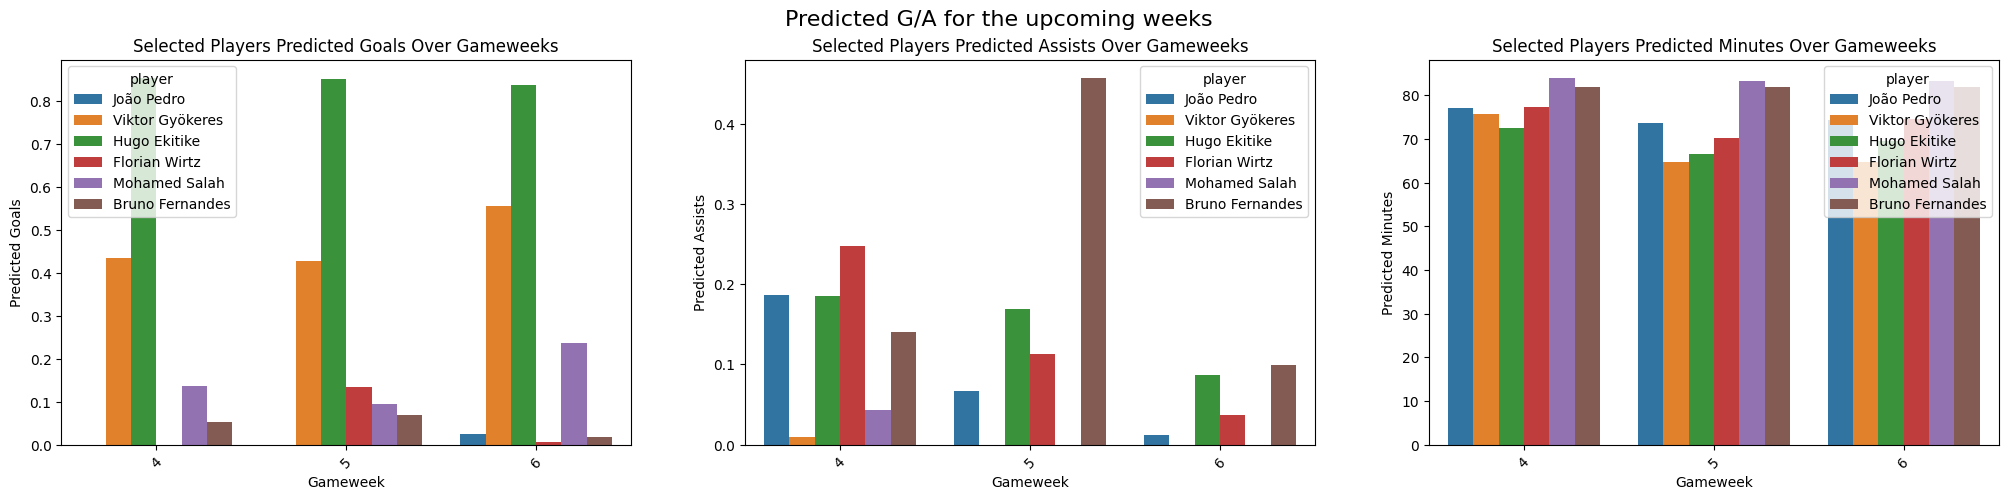

In [ ]:
# Selected players' predicted goals across gameweeks
players = ["João Pedro","Mohamed Salah", "Viktor Gyökeres", "Bruno Fernandes", "Florian Wirtz", "Hugo Ekitike"]
# filter the dataframe (must be a DataFrame, not a boolean Series)
player_stats = ga_forecast[ga_forecast["player"].isin(players)]


# create a 2D axes array so indexing like axes[0,0] works
fig, axes = plt.subplots(1,3, figsize=(25, 5), squeeze=False)
fig.suptitle("Predicted G/A for the upcoming weeks", fontsize=16)

#Top 10 forwards by predicted goals for gameweek 4
sns.barplot(
	ax=axes[0,0],
	data=player_stats,
	x="gw_orig",
	y="pred_goals_mean",
	hue="player",
	errorbar=None
)
axes[0,0].set_title("Selected Players Predicted Goals Over Gameweeks")
axes[0,0].set_ylabel("Predicted Goals")
axes[0,0].set_xlabel("Gameweek")
axes[0,0].tick_params(axis='x', rotation=45)





# show multiple players across gameweeks with hue; set errorbar=None to avoid aggregation confidence intervals
sns.barplot(
	ax=axes[0,1],
	data=player_stats,
	x="gw_orig",
	y="pred_assists_mean",
	hue="player",
	errorbar=None
)
axes[0,1].set_title("Selected Players Predicted Assists Over Gameweeks")
axes[0,1].set_xlabel("Gameweek")
axes[0,1].set_ylabel("Predicted Assists")
axes[0,1].tick_params(axis='x', rotation=45)


sns.barplot(
	ax=axes[0,2],
	data=player_stats,
	x="gw_orig",
	y="pred_minutes",
	hue="player",
	errorbar=None
)
axes[0,2].set_title("Selected Players Predicted Minutes Over Gameweeks")
axes[0,2].set_xlabel("Gameweek")
axes[0,2].set_ylabel("Predicted Minutes")
axes[0,2].tick_params(axis='x', rotation=45)

In [ ]:



positions = ["MID", "FWD"]

no_goals = ga_forecast[(ga_forecast["pred_goals_mean"] == 0) | (ga_forecast["pred_assists_mean"] == 0) ]
no_goals = no_goals[(no_goals["pos"].isin(positions)) & (ga_forecast["pred_minutes"] >= 20.0)].sort_values(["gw_orig", "p_goal"], ascending=[True, False])
#no_goals = no_goals[no_goals["player"].isin(players)]
display(no_goals.head(10))

no_ast = ga_forecast[ga_forecast["pred_assists_mean"] == 0]
display(no_ast.shape)

no_min = ga_forecast[ga_forecast["pred_minutes"].isna()]
display(no_min.shape)

C:\Users\oukan\AppData\Local\Temp\ipykernel_15292\3274155536.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_goals = no_goals[(no_goals["pos"].isin(positions)) & (ga_forecast["pred_minutes"] >= 20.0)].sort_values(["gw_orig", "p_goal"], ascending=[True, False])


,season,gw_orig,date_sched,team_id,player_id,player,pos,pred_minutes,pred_goals_p90_mean,pred_assists_p90_mean,pred_goals_mean,pred_assists_mean,pred_goals_p90_poisson,pred_assists_p90_poisson,pred_goals_poisson,pred_assists_poisson,p_goal,p_assist,p_return_any
287,2025-2026,4,2025-09-12,8331d109,f6786aab,Fabio Carvalho,MID,83.789926,0.953006,0.000000,0.887247,0.000000,0.355512,0.245758,0.330982,0.228800,0.357143,0.169611,0.466179
55,2025-2026,4,2025-09-12,1464d629,9ba7a3af,João Pedro,FWD,77.190663,0.000000,0.217097,0.000000,0.186198,0.420485,0.145731,0.360639,0.124989,0.323529,0.101562,0.392233
148,2025-2026,4,2025-09-12,53c995cd,2fbf5601,Jean-Philippe Mateta,FWD,83.638842,0.307453,0.000000,0.285723,0.000000,0.405444,0.169175,0.376788,0.157218,0.323529,0.101562,0.392233
208,2025-2026,4,2025-09-13,767ff900,2c676f84,Matheus Cunha,FWD,81.889765,0.180528,0.000000,0.164260,0.000000,0.410025,0.153017,0.373076,0.139228,0.323529,0.101562,0.392233
344,2025-2026,4,2025-09-12,bcc4ae28,d84f96dc,Ollie Watkins,FWD,83.991952,0.082392,0.000000,0.076892,0.000000,0.348907,0.127859,0.325616,0.119324,0.323529,0.096154,0.388575
69,2025-2026,4,2025-09-12,1dd1f33c,65c63664,Eberechi Eze,MID,79.318151,0.011549,0.000000,0.010179,0.000000,0.342287,0.240659,0.301662,0.212096,0.219512,0.169611,0.351892
49,2025-2026,4,2025-09-12,1464d629,5e188622,Pedro Neto,MID,83.797143,0.000000,0.308477,0.000000,0.287216,0.218812,0.144937,0.203732,0.134947,0.188811,0.088548,0.260640
240,2025-2026,4,2025-09-12,7fb5d771,b7ddb9eb,James Ward-Prowse,MID,77.811122,0.000000,0.466031,0.000000,0.402916,0.269762,0.159908,0.233227,0.138252,0.188811,0.117783,0.284355
368,2025-2026,4,2025-09-12,ddbd77d6,10d21e45,Anthony Gordon,MID,81.952776,0.632004,0.000000,0.575494,0.000000,0.236927,0.175569,0.215743,0.159870,0.188811,0.127572,0.292296
382,2025-2026,4,2025-09-12,ddbd77d6,d2b90140,Harvey Barnes,MID,79.638743,0.000000,0.219219,0.000000,0.193981,0.264723,0.200637,0.234247,0.177539,0.188811,0.169014,0.325914


(428, 19)

(0, 19)

In [ ]:
#no_goals = ga_model_old[(ga_model_old["pred_goals_mean"] == 0) | (ga_model_old["pred_assists_mean"] == 0) ]
#no_goals = no_goals[(no_goals["pos"].isin(positions)) & (ga_model_old["pred_minutes"] >= 20.0)].sort_values(["gw_orig", "pred_minutes"], ascending=[True, False])
#no_goals = no_goals[no_goals["player"].isin(players)]
#display(no_goals.head(10))



In [ ]:
no_goals_new = ga_model_new[(ga_model_new["pred_goals_mean"] == 0) | (ga_model_new["pred_assists_mean"] == 0) ]
no_goals_new = no_goals_new[(no_goals_new["pos"].isin(positions)) & (ga_model_new["pred_minutes"] >= 20.0)].sort_values(["gw_orig", "p_goal"], ascending=[True, False])
#no_goals_new = no_goals_new[no_goals_new["player"].isin(players)]
display(no_goals_new.head(10))

C:\Users\oukan\AppData\Local\Temp\ipykernel_15292\3750547821.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_goals_new = no_goals_new[(no_goals_new["pos"].isin(positions)) & (ga_model_new["pred_minutes"] >= 20.0)].sort_values(["gw_orig", "p_goal"], ascending=[True, False])


,season,gw_orig,date_played,player_id,team_id,player,pos,venue,minutes,pred_minutes,goals_true,assists_true,pred_goals_p90_mean,pred_assists_p90_mean,pred_goals_mean,pred_assists_mean,p_goal,p_assist,p_return_any
119,2024-2025,30,2025-04-02,29f66656,8331d109,Bryan Mbeumo,FWD,Away,90,84.651497,1.0,0.0,0.059726,0.000000,0.056177,0.000000,0.323529,0.101562,0.392233
120,2024-2025,30,2025-04-02,2b5a53c9,259f237e,Cody Gakpo,FWD,Home,5,37.536267,0.0,0.0,0.832194,0.000000,0.347083,0.000000,0.323529,0.163934,0.434426
180,2024-2025,30,2025-04-02,6cce983d,ddbd77d6,Alexander Isak,FWD,Home,65,73.442802,1.0,0.0,0.041927,0.000000,0.034214,0.000000,0.323529,0.101562,0.392233
125,2024-2025,30,2025-04-02,2fbf5601,53c995cd,Jean-Philippe Mateta,FWD,Away,58,83.563733,0.0,0.0,0.000000,0.765876,0.000000,0.711105,0.250000,0.277778,0.458333
305,2024-2025,30,2025-04-03,d8435afe,2d0845b3,Dominic Solanke,FWD,Away,90,83.823346,0.0,0.0,0.470919,0.000000,0.438600,0.000000,0.218750,0.101562,0.298096
66,2024-2025,30,2025-04-01,bf931d17,223048dd,Jørgen Strand Larsen,FWD,Home,90,61.868391,1.0,0.0,0.765878,0.000000,0.526485,0.000000,0.200000,0.096154,0.276923
176,2024-2025,30,2025-04-02,65c63664,53c995cd,Eberechi Eze,MID,Away,90,80.895331,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.188811,0.127572,0.292296
207,2024-2025,30,2025-04-02,8d702b71,53c995cd,Ismaila Sarr,MID,Away,90,60.000000,0.0,0.0,0.000000,0.455719,0.000000,0.303812,0.188811,0.169014,0.325914
230,2024-2025,30,2025-04-02,b55c449a,259f237e,Mohamed Salah,MID,Home,89,84.396484,0.0,0.0,0.446947,0.000000,0.419120,0.000000,0.188811,0.169611,0.326398
284,2024-2025,30,2025-04-03,5c02cb8e,1464d629,Cole Palmer,MID,Home,89,78.416308,0.0,1.0,0.000000,0.355798,0.000000,0.310004,0.188811,0.169014,0.325914


In [ ]:
minutes_old = pd.read_csv("../data/predictions/minutes/2025-2026/GW4_6.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","pred_minutes","p_start","p60","p_cameo","pred_start_head","pred_bench_head","pred_bench_cameo_head","pred_minutes","fdr"])

sub = minutes_old.query("player_id=='9ba7a3af' and gw_orig in [4,5,6]")[
    ["gw_orig","p_start","p60","p_cameo","pred_start_head","pred_bench_head",
     "pred_bench_cameo_head","pred_minutes","fdr"]
]
display(sub)


,gw_orig,p_start,p60,p_cameo,pred_start_head,pred_bench_head,pred_bench_cameo_head,pred_minutes,fdr
55,4,0.929989,0.761194,1.000000e-15,77.190663,2.237659e-14,22.376594,77.190663,3
462,5,0.898792,0.709091,1.000000e-15,73.633436,2.184986e-14,21.849860,73.633436,3
869,6,0.898792,0.709091,1.000000e-15,74.332983,2.236772e-14,22.367722,74.332983,4


In [ ]:
minutes_new = pd.read_csv("../data/predictions/minutes/2025-2026/GW4_8.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","pred_minutes","p_start","p60","p_cameo","pred_start_head","pred_bench_head","pred_bench_cameo_head","pred_minutes","fdr", "_is_synth"])

sub = minutes_new.query("player_id=='dcfd6f9f'")[
    ["player","gw_orig","p_start","p60","p_cameo","pred_start_head","pred_bench_head",
     "pred_bench_cameo_head","pred_minutes","fdr"]
]
display(sub.head(10))

dup = minutes_new.groupby(["season","gw_orig","team_id","player_id"]).size()
dup[dup>1]



share_high = (minutes_new["p_start"] >= 0.65).mean()
share_low  = (minutes_new["p_start"] <= 0.25).mean()
share_mix  = 1 - share_high - share_low




minutes_new["fdr"].describe()
minutes_new.groupby("gw_orig")["fdr"].apply(lambda s: s.isna().mean())




,player,gw_orig,p_start,p60,p_cameo,pred_start_head,pred_bench_head,pred_bench_cameo_head,pred_minutes,fdr
224,Matthijs de Ligt,4,0.901175,0.709091,1.000000e-15,82.106617,1.830119e-14,18.301187,82.106617,5
631,Matthijs de Ligt,5,0.910051,0.709091,1.000000e-15,82.106617,1.668255e-14,16.682552,82.106617,4
1038,Matthijs de Ligt,6,0.910051,0.709091,1.000000e-15,82.106617,1.668255e-14,16.682552,82.106617,4
1445,Matthijs de Ligt,7,0.910051,0.709091,1.000000e-15,82.106617,1.668255e-14,16.682552,82.106617,4
1852,Matthijs de Ligt,8,0.901175,0.709091,1.000000e-15,82.106617,1.830119e-14,18.301187,82.106617,5


gw_orig
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
Name: fdr, dtype: float64

In [ ]:
minutes_df = pd.read_csv("../data/models/minutes/versions/v1/expected_minutes.csv", usecols = ["season","gw_orig","date_played","player_id","team_id","player","pos","pred_minutes","minutes_true","p_start","p60","p_cameo","pred_start_head","pred_bench_head","pred_bench_cameo_head","pred_minutes","fdr"])

sub = minutes_df.query("player_id=='b8c761b1'")[
    ["gw_orig","p_start","p60","p_cameo","pred_start_head","pred_bench_head",
     "pred_bench_cameo_head","pred_minutes","minutes_true","fdr"]
]
display(sub)

,gw_orig,p_start,p60,p_cameo,pred_start_head,pred_bench_head,pred_bench_cameo_head,pred_minutes,minutes_true,fdr
2264,32,0.486985,0.423077,1.0,61.163817,20.848916,20.848916,40.481649,9,4
2265,33,0.349128,0.197674,1.0,57.997877,22.619767,22.619767,34.971244,58,4
2266,34,0.572243,0.454545,1.0,62.861830,21.944677,21.944677,45.359236,64,4
2267,35,0.617485,0.454545,1.0,66.916162,22.870517,22.870517,50.068022,90,3
2268,36,0.864785,0.805616,1.0,80.453894,21.467659,21.467659,80.453894,90,3
2269,37,0.869213,0.889749,1.0,80.998141,22.444440,22.444440,80.998141,10,5
2270,38,0.376267,0.333333,1.0,60.422898,17.816721,17.816721,33.848016,45,4


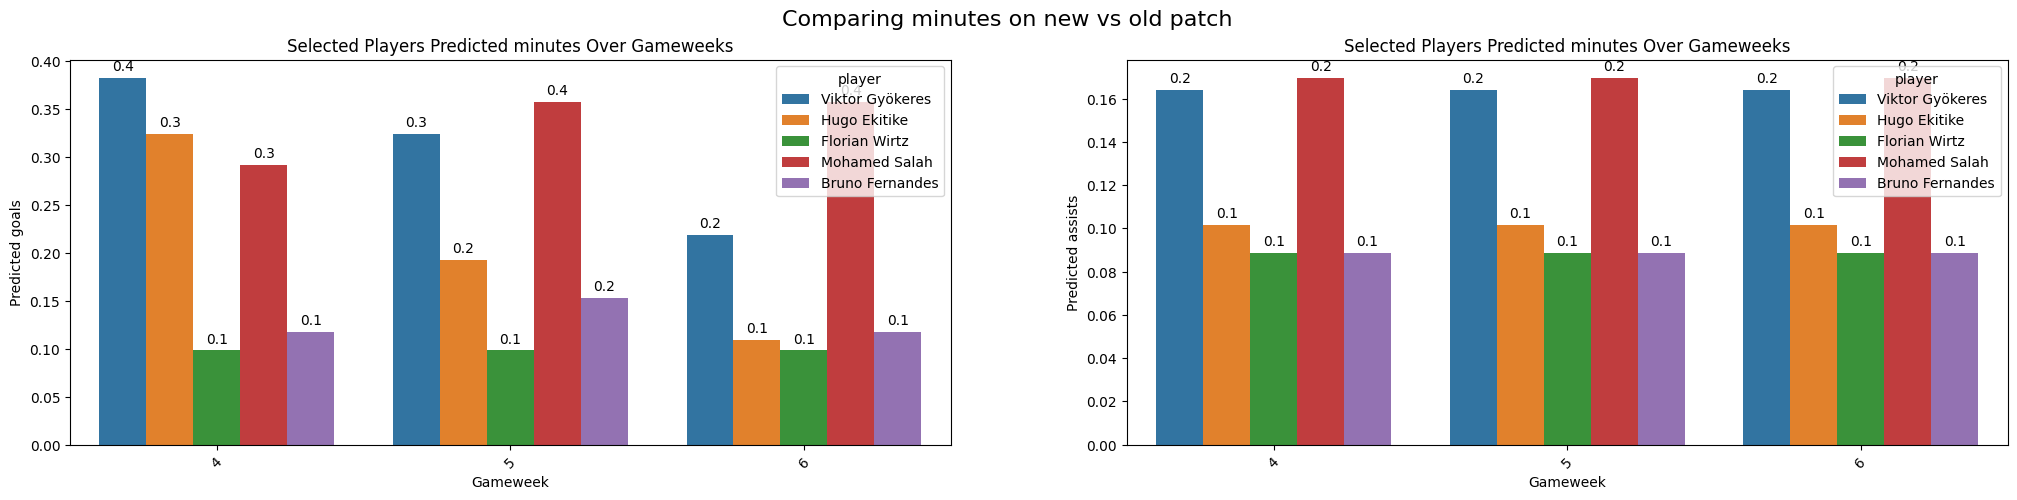

In [ ]:
# Selected players' predicted goals across gameweeks
players = ["Viktor Gyökeres", "Bruno Fernandes", "Florian Wirtz", "Hugo Ekitike", "Mohamed Salah"]
# filter the dataframe (must be a DataFrame, not a boolean Series)
old = ga_forecast[ga_forecast["player"].isin(players)]

new = minutes_new[minutes_new["player"].isin(players)]


# create a 2D axes array so indexing like axes[0,0] works
fig, axes = plt.subplots(1,2, figsize=(25, 5), squeeze=False)
fig.suptitle("Comparing minutes on new vs old patch", fontsize=16)

#Top 10 forwards by predicted goals for gameweek 4
sns.barplot(
	ax=axes[0,0],
	data=old,
	x="gw_orig",
	y="p_goal",
	hue="player",
	errorbar=None
)
axes[0,0].set_title("Selected Players Predicted minutes Over Gameweeks")
axes[0,0].set_ylabel("Predicted goals")
axes[0,0].set_xlabel("Gameweek")
# collect the bar artists in a robust way (handle different matplotlib / seaborn internals)
ax0 = axes[0,0]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax0, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax0, "patches"):
	bars = list(ax0.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax0.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax0.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass

ax0.tick_params(axis='x', rotation=45)






# show multiple players across gameweeks with hue; set errorbar=None to avoid aggregation confidence intervals
sns.barplot(
	ax=axes[0,1],
	data=old,
	x="gw_orig",
	y="p_assist",
	hue="player",
	errorbar=None
)
axes[0,1].set_title("Selected Players Predicted minutes Over Gameweeks")
axes[0,1].set_xlabel("Gameweek")
axes[0,1].set_ylabel("Predicted assists")

ax1 = axes[0,1]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax1, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax1, "patches"):
	bars = list(ax1.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax1.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax1.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass
ax1.tick_params(axis='x', rotation=45)



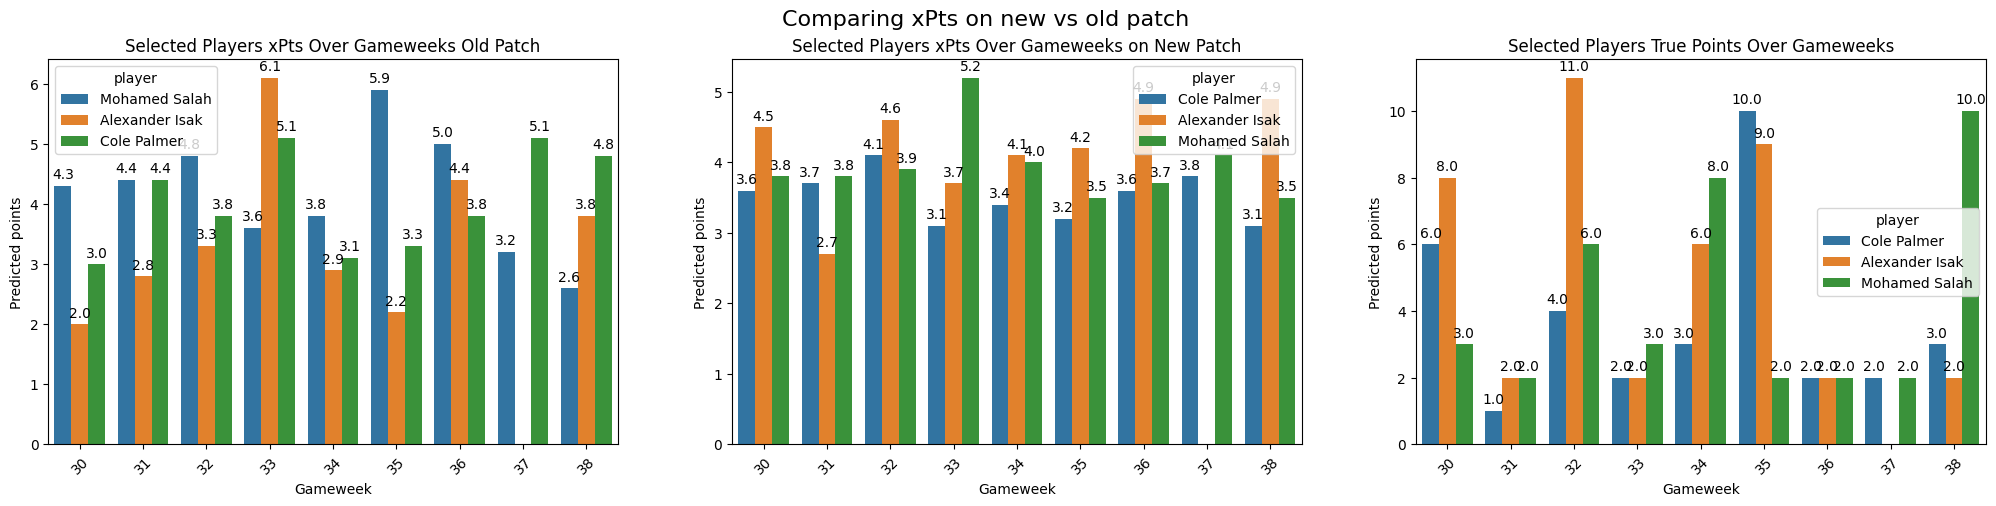

In [ ]:
# Selected players' predicted goals across gameweeks
players = [ "Alexander Isak", "Cole Palmer", "Mohamed Salah"]

xP_old = pd.read_csv("../data/models/expected_points/v3/expected_points.csv")
xP_new = pd.read_csv("../data/models/expected_points/v1/expected_points.csv")
# filter the dataframe (must be a DataFrame, not a boolean Series)
old = xP_old[xP_old["player"].isin(players)]

new = xP_new[xP_new["player"].isin(players)]


# create a 2D axes array so indexing like axes[0,0] works
fig, axes = plt.subplots(1,3, figsize=(25, 5), squeeze=False)
fig.suptitle("Comparing xPts on new vs old patch", fontsize=16)

#Top 10 forwards by predicted goals for gameweek 4
sns.barplot(
	ax=axes[0,0],
	data=old,
	x="gw_orig",
	y="xPts",
	hue="player",
	errorbar=None
)
axes[0,0].set_title("Selected Players xPts Over Gameweeks Old Patch")
axes[0,0].set_ylabel("Predicted points")
axes[0,0].set_xlabel("Gameweek")
# collect the bar artists in a robust way (handle different matplotlib / seaborn internals)
ax0 = axes[0,0]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax0, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax0, "patches"):
	bars = list(ax0.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax0.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax0.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass

ax0.tick_params(axis='x', rotation=45)






# show multiple players across gameweeks with hue; set errorbar=None to avoid aggregation confidence intervals
sns.barplot(
	ax=axes[0,1],
	data=new,
	x="gw_orig",
	y="xPts",
	hue="player",
	errorbar=None
)
axes[0,1].set_title("Selected Players xPts Over Gameweeks on New Patch")
axes[0,1].set_xlabel("Gameweek")
axes[0,1].set_ylabel("Predicted points")

ax1 = axes[0,1]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax1, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax1, "patches"):
	bars = list(ax1.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax1.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax1.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass
ax1.tick_params(axis='x', rotation=45)

# show multiple players across gameweeks with hue; set errorbar=None to avoid aggregation confidence intervals
sns.barplot(
	ax=axes[0,2],
	data=new,
	x="gw_orig",
	y="total_points",
	hue="player",
	errorbar=None
)
axes[0,2].set_title("Selected Players True Points Over Gameweeks")
axes[0,2].set_xlabel("Gameweek")
axes[0,2].set_ylabel("Predicted points")

ax2 = axes[0,2]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax2, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax2, "patches"):
	bars = list(ax2.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax2.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax2.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass
ax2.tick_params(axis='x', rotation=45)


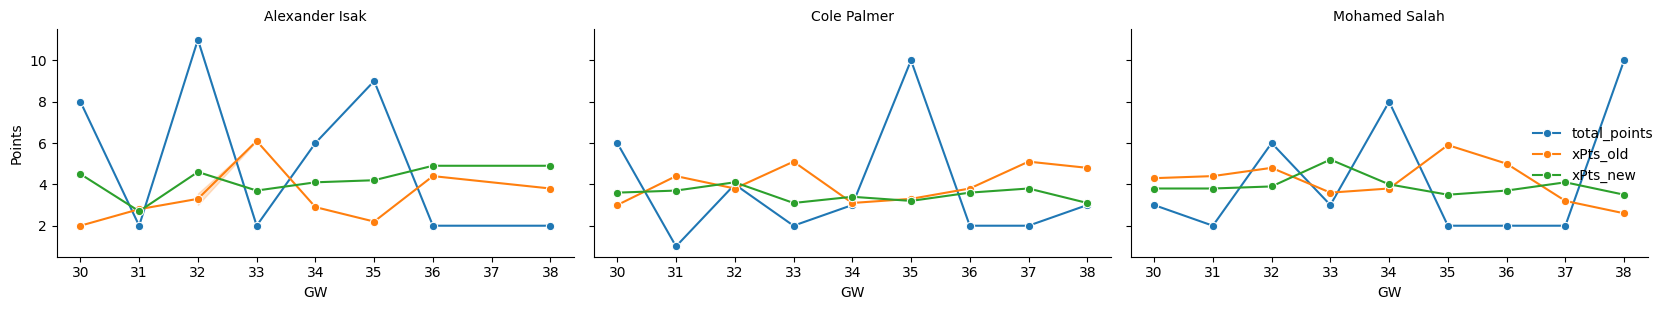

In [ ]:
# Selected players' predicted goals across gameweeks
players = [ "Alexander Isak", "Cole Palmer", "Mohamed Salah"]
metrics = ["total_points", "xPts_old", "xPts_new"]

xP_old = pd.read_csv("../data/models/expected_points/v3/expected_points.csv", usecols = ["season","gw_orig","player","xPts"]).rename(columns={"xPts":"xPts_old"})
xP_new = pd.read_csv("../data/models/expected_points/v1/expected_points.csv" , usecols = ["season","gw_orig","player","total_points","xPts"]).rename(columns={"xPts":"xPts_new"})
df = xP_new.merge(xP_old, how="left", on=["season","gw_orig","player"])

# Filter the selected players and tidy for plotting
df = df[df["player"].isin(players)].copy()
df["gw_orig"] = pd.to_numeric(df["gw_orig"], errors="coerce")
df = df.dropna(subset=["gw_orig"]).sort_values(["player","gw_orig"])

long = df.melt(
    id_vars=["season","player","gw_orig"],
    value_vars=metrics,
    var_name="metric",
    value_name="value"
).dropna(subset=["value"])

# A) Single-player comparison (old vs new vs actual)
#p = "Alexander Isak"
#a = long[long["player"].eq(p)]
#plt.figure(figsize=(12, 6))
#sns.lineplot(data=a, x="gw_orig", y="value", hue="metric", marker="o")
#plt.title(f"{p} — xPts (old vs new) vs actual points by GW")
#plt.xlabel("GW"); plt.ylabel("Points"); plt.legend(title="")
#plt.tight_layout(); plt.show()

# B) Compare all selected players; facet by player
g = sns.FacetGrid(long, col="player", col_wrap=3, sharey=True, height=3.2, aspect=1.6)
g.map_dataframe(sns.lineplot, x="gw_orig", y="value", hue="metric", marker="o")
g.add_legend(title=""); g.set_axis_labels("GW","Points"); g.set_titles("{col_name}")
plt.tight_layout(); plt.show()

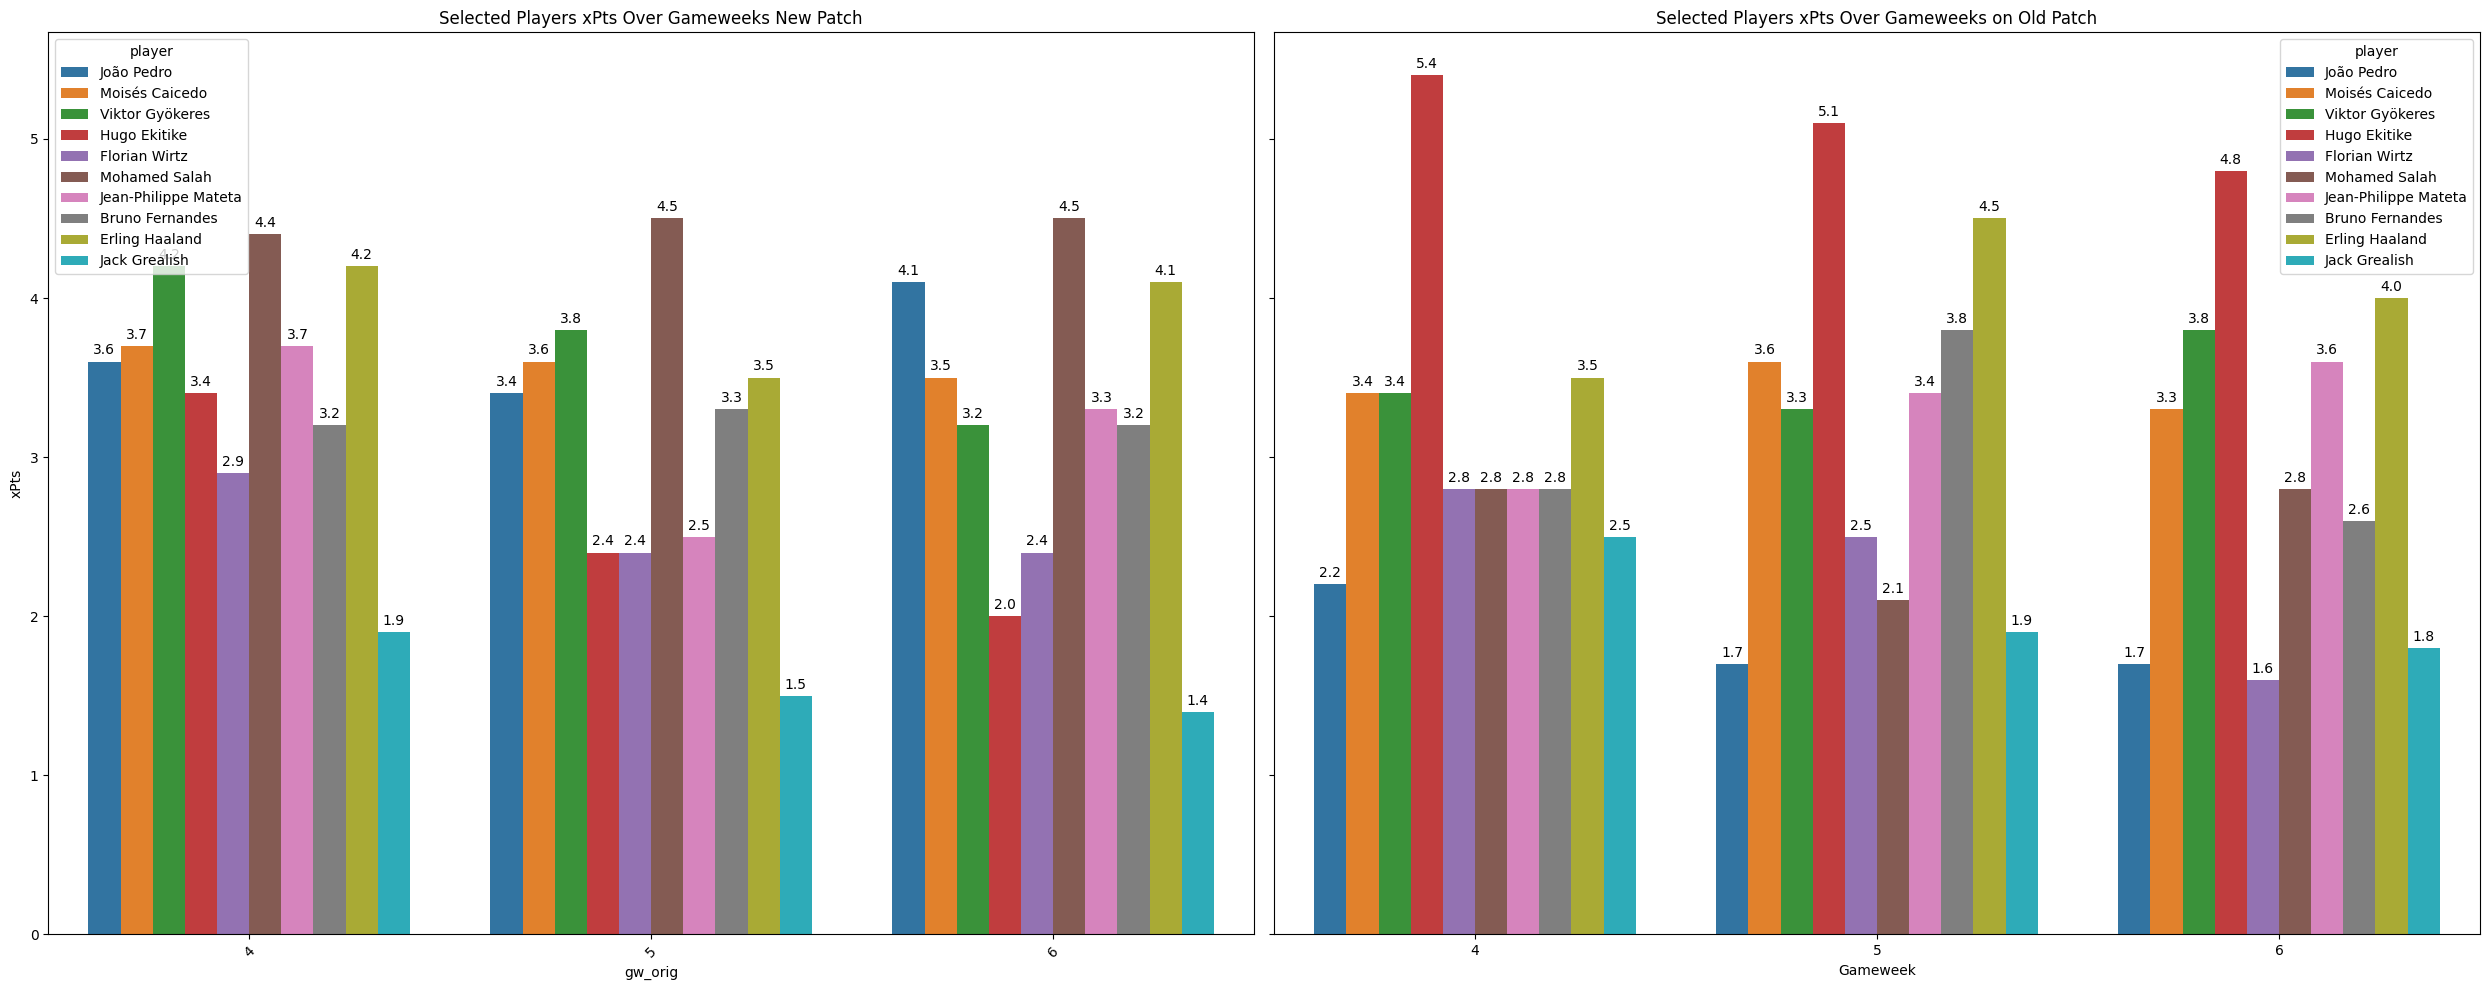

In [ ]:
xp_forecast = pd.read_csv("../data/predictions/expected_points/v2/expected_points.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","xp_appearance","xp_goals","xp_assists","xp_clean_sheets","xp_concede_penalty","xp_saves_points","xp_discipline_prior","xp_dcp_bonus","xPts"])
xp_old = pd.read_csv("../data/predictions/expected_points/v1/expected_points.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","xp_appearance","xp_goals","xp_assists","xp_clean_sheets","xp_concede_penalty","xp_saves_points","xp_discipline_prior","xp_dcp_bonus","xPts"])
players = ["João Pedro", "Mohamed Salah", "Viktor Gyökeres", "Bruno Fernandes", "Florian Wirtz", "Hugo Ekitike", "Jean-Philippe Mateta", "Erling Haaland", "Jack Grealish", "Moisés Caicedo"]

df = xp_forecast[xp_forecast["player"].isin(players)].copy()
df_old = xp_old[xp_old["player"].isin(players)].copy()



fig, axes = plt.subplots(1,2, figsize=(25, 10), squeeze=False, sharey=True)  # ensure a 2D axes array so indexing like axes[0,0] works


#New patch xPts
sns.barplot(
	ax=axes[0,0],
	data=df,
	x="gw_orig",
	y="xPts",
	hue="player",
	errorbar=None
)
axes[0,0].set_title("Selected Players xPts Over Gameweeks New Patch")

ax1 = axes[0,0]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax1, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax1, "patches"):
	bars = list(ax1.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax1.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax1.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass
ax1.tick_params(axis='x', rotation=45)


#Old patch xPts
sns.barplot(
	ax=axes[0,1],
	data=df_old,
	x="gw_orig",
	y="xPts",
	hue="player",
	errorbar=None
)
axes[0,1].set_title("Selected Players xPts Over Gameweeks on Old Patch")
axes[0,1].set_xlabel("Gameweek")

ax2 = axes[0,1]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax2, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax2, "patches"):
	bars = list(ax2.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax2.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax2.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass
ax2.tick_params(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
xp_forecast = pd.read_csv("../data/predictions/expected_points/v2/expected_points.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","xp_appearance","xp_goals","xp_assists","xp_clean_sheets","xp_concede_penalty","xp_saves_points","xp_discipline_prior","xp_dcp_bonus","xPts"])
xp_old = pd.read_csv("../data/predictions/expected_points/v1/expected_points.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","xp_appearance","xp_goals","xp_assists","xp_clean_sheets","xp_concede_penalty","xp_saves_points","xp_discipline_prior","xp_dcp_bonus","xPts"])


df = xp_forecast.copy()
df_old = xp_old.copy()

forwards = df[df["pos"] == "FWD"].sort_values("xPts", ascending=False).head()
midfielders = df[df["pos"] == "MID"].sort_values("xPts", ascending=False).head()
defenders = df[df["pos"] == "DEF"].sort_values("xPts", ascending=False).head()
gk = df[df["pos"] == "GK"].sort_values("xPts", ascending=False).head()

fwd_old = df_old[df_old["pos"] == "FWD"].sort_values("xPts", ascending=False).head()
mid_old = df_old[df_old["pos"] == "MID"].sort_values("xPts", ascending=False).head()
def_old = df_old[df_old["pos"] == "DEF"].sort_values("xPts", ascending=False).head()
gk_old = df_old[df_old["pos"] == "GK"].sort_values("xPts", ascending=False).head()

display(midfielders)

,season,date_sched,gw_orig,player_id,team_id,player,pos,xp_appearance,xp_goals,xp_assists,xp_clean_sheets,xp_concede_penalty,xp_saves_points,xp_discipline_prior,xp_dcp_bonus,xPts
287,2025-2026,2025-09-13,4,f6786aab,8331d109,Fabio Carvalho,MID,1.85,2.21,0.56,0.17,0.0,0.0,-0.13,0.28,5.1
606,2025-2026,2025-09-20,5,bef4a612,5dbeea62,Mats Wieffer,MID,1.60,1.05,0.38,0.13,0.0,0.0,-0.13,1.44,4.6
523,2025-2026,2025-09-20,5,b55c449a,259f237e,Mohamed Salah,MID,1.62,2.21,0.56,0.13,0.0,0.0,-0.13,0.00,4.5
930,2025-2026,2025-09-27,6,b55c449a,259f237e,Mohamed Salah,MID,1.62,2.21,0.56,0.13,0.0,0.0,-0.13,0.00,4.5
1013,2025-2026,2025-09-27,6,bef4a612,5dbeea62,Mats Wieffer,MID,1.60,1.05,0.38,0.04,0.0,0.0,-0.13,1.32,4.4


,season,date_sched,gw_orig,player_id,team_id,player,pos,xp_appearance,xp_goals,xp_assists,xp_clean_sheets,xp_concede_penalty,xp_saves_points,xp_discipline_prior,xp_dcp_bonus,xPts
287,2025-2026,2025-09-13,4,f6786aab,8331d109,Fabio Carvalho,MID,1.85,2.21,0.56,0.17,0.0,0.0,-0.13,0.28,5.1
606,2025-2026,2025-09-20,5,bef4a612,5dbeea62,Mats Wieffer,MID,1.60,1.05,0.38,0.13,0.0,0.0,-0.13,1.44,4.6
523,2025-2026,2025-09-20,5,b55c449a,259f237e,Mohamed Salah,MID,1.62,2.21,0.56,0.13,0.0,0.0,-0.13,0.00,4.5
930,2025-2026,2025-09-27,6,b55c449a,259f237e,Mohamed Salah,MID,1.62,2.21,0.56,0.13,0.0,0.0,-0.13,0.00,4.5
1013,2025-2026,2025-09-27,6,bef4a612,5dbeea62,Mats Wieffer,MID,1.60,1.05,0.38,0.04,0.0,0.0,-0.13,1.32,4.4


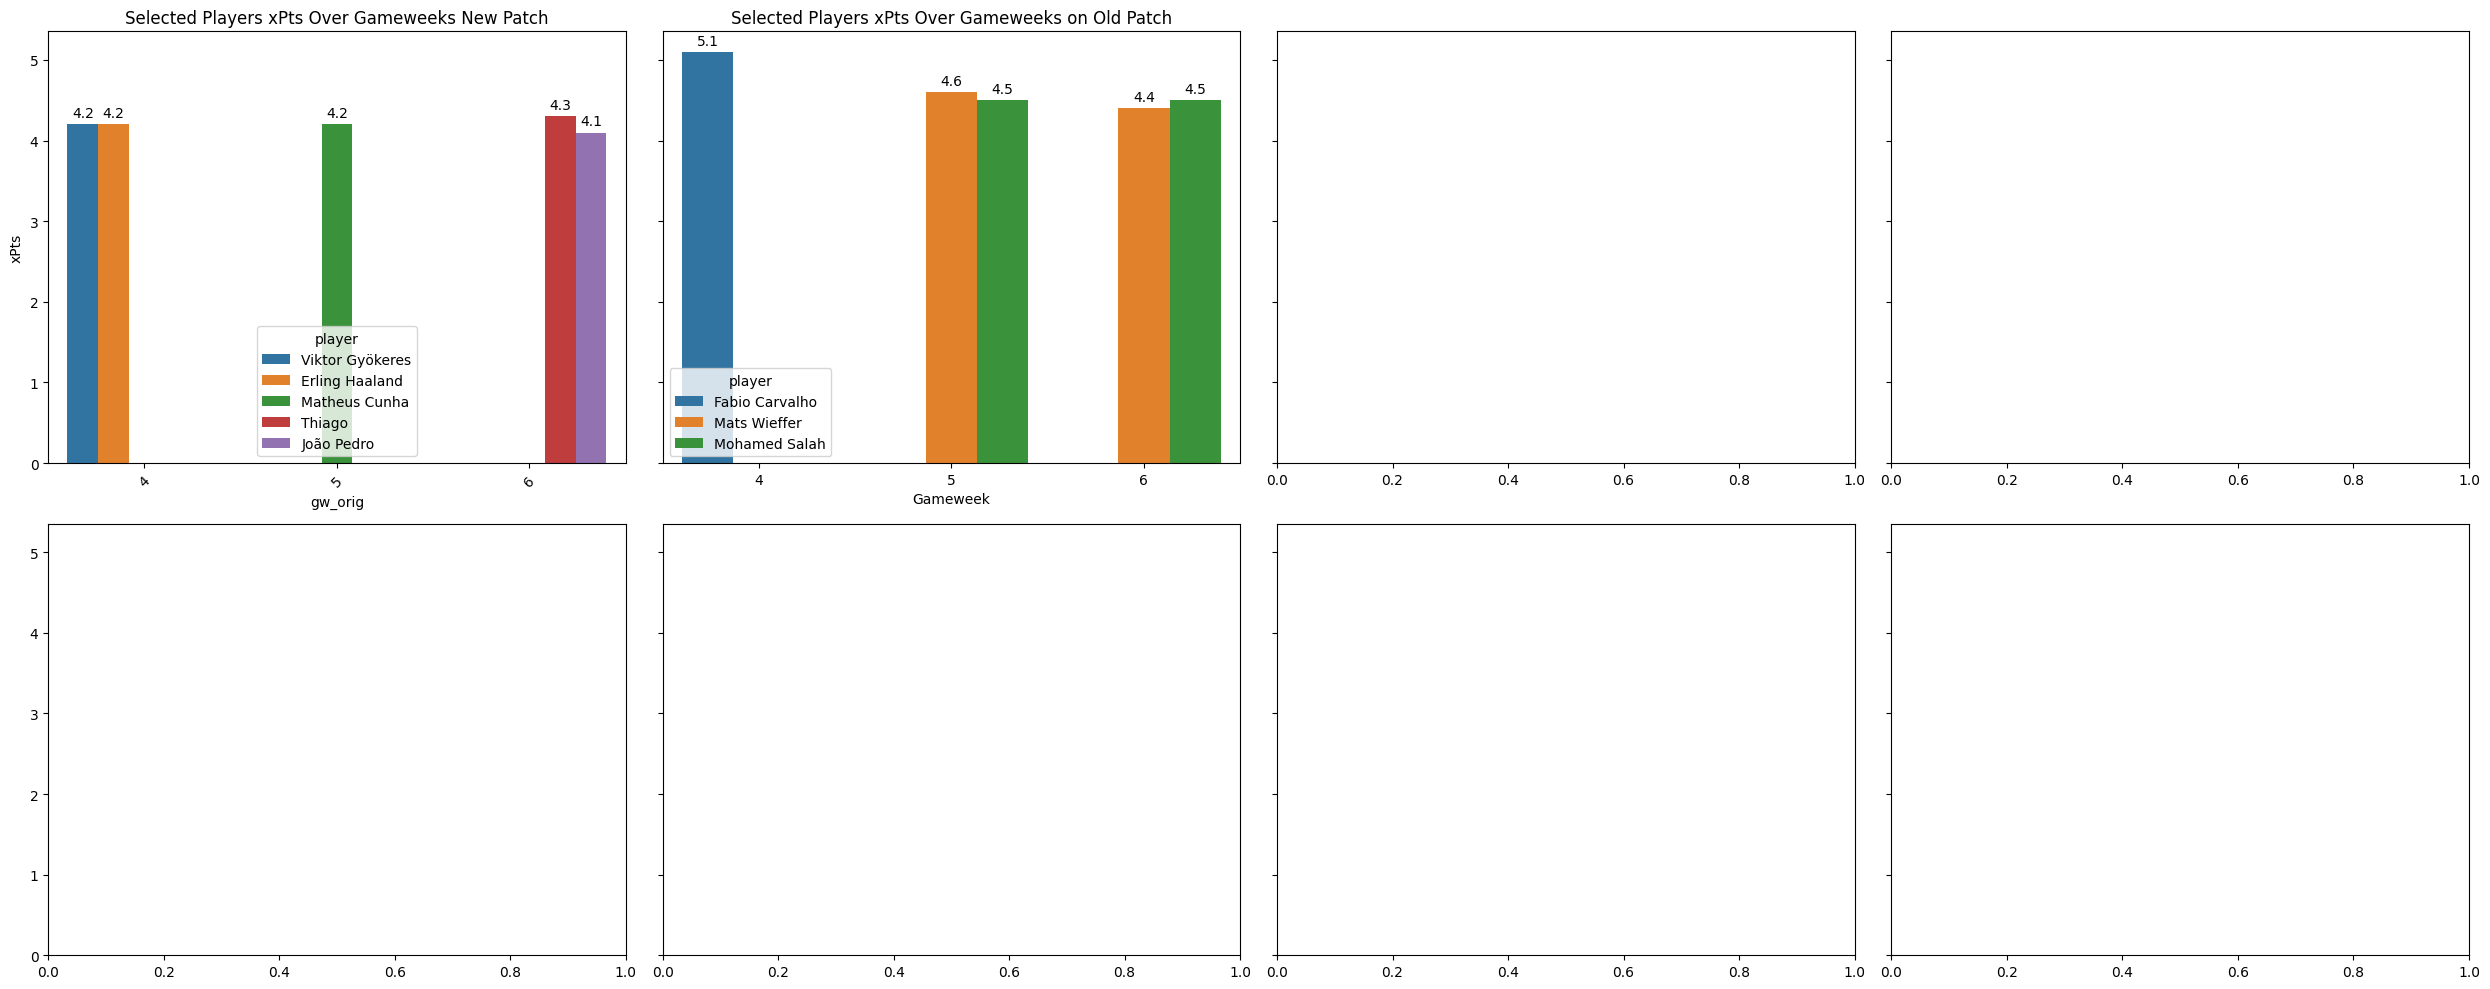

In [ ]:

xp_forecast = pd.read_csv("../data/predictions/expected_points/v2/expected_points.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","xp_appearance","xp_goals","xp_assists","xp_clean_sheets","xp_concede_penalty","xp_saves_points","xp_discipline_prior","xp_dcp_bonus","xPts"])
xp_old = pd.read_csv("../data/predictions/expected_points/v1/expected_points.csv", usecols = ["season","gw_orig","date_sched","player_id","team_id","player","pos","xp_appearance","xp_goals","xp_assists","xp_clean_sheets","xp_concede_penalty","xp_saves_points","xp_discipline_prior","xp_dcp_bonus","xPts"])


df = xp_forecast.copy()
df_old = xp_old.copy()

forwards = df[df["pos"] == "FWD"].sort_values("xPts", ascending=False).head()
midfielders = df[df["pos"] == "MID"].sort_values("xPts", ascending=False).head()
defenders = df[df["pos"] == "DEF"].sort_values("xPts", ascending=False).head()
gk = df[df["pos"] == "GK"].sort_values("xPts", ascending=False).head()

fwd_old = df_old[df_old["pos"] == "FWD"].sort_values("xPts", ascending=False).head()
mid_old = df_old[df_old["pos"] == "MID"].sort_values("xPts", ascending=False).head()
def_old = df_old[df_old["pos"] == "DEF"].sort_values("xPts", ascending=False).head()
gk_old = df_old[df_old["pos"] == "GK"].sort_values("xPts", ascending=False).head()

display(midfielders)


fig, axes = plt.subplots(2,4, figsize=(25, 10), squeeze=False, sharey=True)  # ensure a 2D axes array so indexing like axes[0,0] works


#New patch xPts
sns.barplot(
	ax=axes[0,0],
	data=forwards,
	x="gw_orig",
	y="xPts",
	hue="player",
	errorbar=None
)
axes[0,0].set_title("Selected Players xPts Over Gameweeks New Patch")

ax1 = axes[0,0]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax1, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax1, "patches"):
	bars = list(ax1.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax1.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax1.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass
ax1.tick_params(axis='x', rotation=45)


#Old patch xPts
sns.barplot(
	ax=axes[0,1],
	data=midfielders,
	x="gw_orig",
	y="xPts",
	hue="player",
	errorbar=None
)
axes[0,1].set_title("Selected Players xPts Over Gameweeks on Old Patch")
axes[0,1].set_xlabel("Gameweek")

ax2 = axes[0,1]
bars = []

# prefer containers (BarContainer/ArtistList) if available
for c in getattr(ax2, "containers", []):
	try:
		# some containers are iterable of rectangles
		bars.extend(list(c))
	except Exception:
		# fallback: append the container itself if bar_label accepts it
		bars.append(c)

# fallback to patches if no containers found
if not bars and hasattr(ax2, "patches"):
	bars = list(ax2.patches)

if bars:
	# matplotlib.bar_label accepts containers or a list of rectangles
	try:
		ax2.bar_label(bars, padding=3, fmt="%.1f")
	except Exception:
		# last-resort: try labeling individual rectangles
		for rect in bars:
			try:
				height = rect.get_height()
				ax2.annotate(f"{height:.1f}",
							 xy=(rect.get_x() + rect.get_width() / 2, height),
							 xytext=(0, 3), textcoords="offset points",
							 ha="center", va="bottom")
			except Exception:
				pass
ax2.tick_params(axis='x')
plt.tight_layout()
plt.show()

         season  gw_orig           player  pos  xPts
287   2025-2026        4   Fabio Carvalho  MID   5.1
116   2025-2026        4    Mohamed Salah  MID   4.4
199   2025-2026        4     Mats Wieffer  MID   4.4
66    2025-2026        4  Viktor Gyökeres  FWD   4.2
300   2025-2026        4   Erling Haaland  FWD   4.2
606   2025-2026        5     Mats Wieffer  MID   4.6
523   2025-2026        5    Mohamed Salah  MID   4.5
615   2025-2026        5    Matheus Cunha  FWD   4.2
473   2025-2026        5  Viktor Gyökeres  FWD   3.8
694   2025-2026        5   Fabio Carvalho  MID   3.7
930   2025-2026        6    Mohamed Salah  MID   4.5
1013  2025-2026        6     Mats Wieffer  MID   4.4
1101  2025-2026        6   Fabio Carvalho  MID   4.3
1082  2025-2026        6           Thiago  FWD   4.3
869   2025-2026        6       João Pedro  FWD   4.1


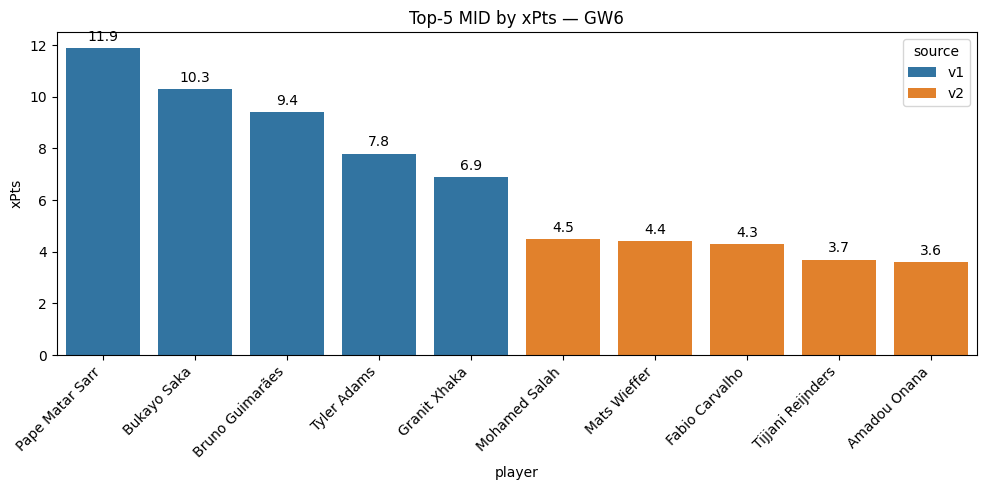

In [ ]:
cols = ["season","gw_orig","date_sched","player_id","team_id","player","pos",
        "xp_appearance","xp_goals","xp_assists","xp_clean_sheets",
        "xp_concede_penalty","xp_saves_points","xp_discipline_prior",
        "xp_dcp_bonus","xPts"]

v2 = pd.read_csv("../data/predictions/expected_points/v2/expected_points.csv", usecols=cols)
v1 = pd.read_csv("../data/predictions/expected_points/v1/expected_points.csv", usecols=cols)

# --- hygiene ---
for df in (v1, v2):
    df["gw_orig"] = pd.to_numeric(df["gw_orig"], errors="coerce")
    df["xPts"] = pd.to_numeric(df["xPts"], errors="coerce")
    df.dropna(subset=["gw_orig","xPts"], inplace=True)

# (optional) focus one season to avoid cross-season GW collisions
# season = "2025-2026"
# v1 = v1[v1["season"].eq(season)]
# v2 = v2[v2["season"].eq(season)]

# If duplicates per player/GW exist (e.g., joins, DGWs as separate rows), keep the highest xPts:
v1 = (v1.sort_values("xPts", ascending=False)
        .drop_duplicates(subset=["season","gw_orig","player_id"], keep="first"))
v2 = (v2.sort_values("xPts", ascending=False)
        .drop_duplicates(subset=["season","gw_orig","player_id"], keep="first"))

# -------- Top-5 per GW (overall) --------
top5_v1 = (v1.sort_values(["season","gw_orig","xPts"], ascending=[True, True, False])
             .groupby(["season","gw_orig"]).head(5).assign(source="v1"))
top5_v2 = (v2.sort_values(["season","gw_orig","xPts"], ascending=[True, True, False])
             .groupby(["season","gw_orig"]).head(5).assign(source="v2"))

# (optional) Top-5 per GW *and* per position
top5pos_v1 = (v1.sort_values(["season","gw_orig","pos","xPts"], ascending=[True, True, True, False])
                .groupby(["season","gw_orig","pos"]).head(5).assign(source="v1"))
top5pos_v2 = (v2.sort_values(["season","gw_orig","pos","xPts"], ascending=[True, True, True, False])
                .groupby(["season","gw_orig","pos"]).head(5).assign(source="v2"))

# Quick sanity peek: top-5 list for each GW (v2)
print(top5_v2.loc[:, ["season","gw_orig","player","pos","xPts"]].head(20))

# -------- Example plot: compare v1 vs v2 for one GW & one position --------
gw_to_plot = 6
pos = "MID"

plot_df = pd.concat([top5pos_v2, top5pos_v1], ignore_index=True)
plot_df = plot_df.query("gw_orig == @gw_to_plot and pos == @pos").copy()
plot_df.sort_values("xPts", ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=plot_df, x="player", y="xPts", hue="source", errorbar=None)  # one row per bar ⇒ no averaging
plt.title(f"Top-5 {pos} by xPts — GW{gw_to_plot}")
plt.xticks(rotation=45, ha="right")
ax = plt.gca()
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f", padding=3)
plt.tight_layout()
plt.show()

rows with fdr mismatch: 0


,season,team_id,gw_played,player_id,player,is_home,fdr_minutes,fdr_gold,fdr_home,fdr_away


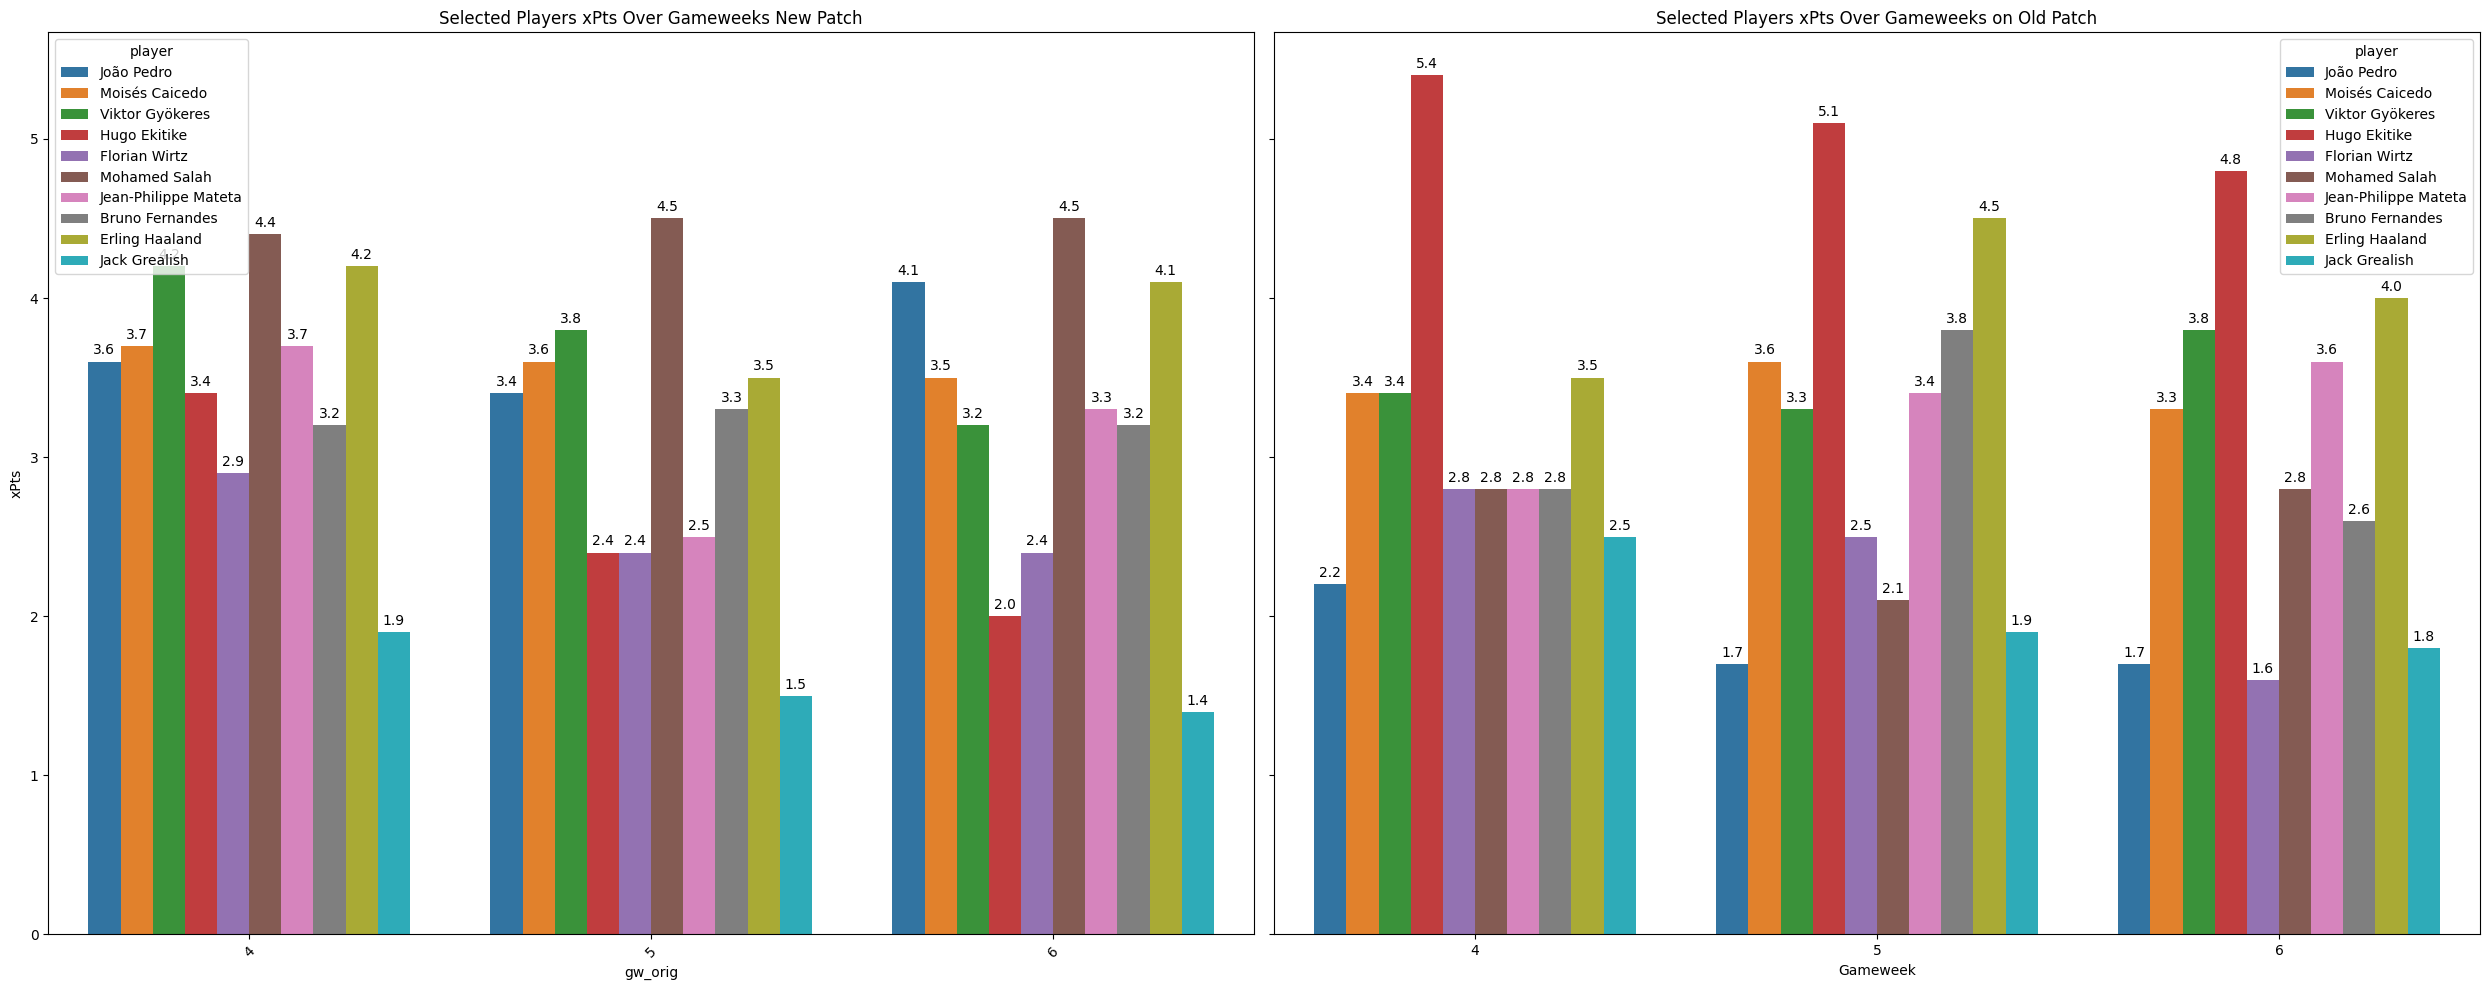

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- load the exact artifacts minutes_forecast used ---
mins = pd.read_csv("../data/predictions/goals_assists/2025-2026/GW5_7.csv")  # adjust path/name
tf   = pd.read_csv("../data/processed/registry/fixtures/2025-2026/fixture_calendar.csv")
form = pd.read_csv("../data/processed/registry/features/v2/2025-2026/team_form.csv")  # version/source you used

# Coerce types like the script does
for c in ("gw_played","gw_orig","gw"):
    if c in tf.columns:   tf[c]   = pd.to_numeric(tf[c], errors="coerce")
    if c in mins.columns: mins[c] = pd.to_numeric(mins[c], errors="coerce")
for df in (tf, mins, form):
    if "team_id" in df.columns: df["team_id"] = df["team_id"].astype(str)

# Pick the GW key like the model does: gw_played>0 → gw_orig>0 → gw>0
def pick_gw_key(cols):
    for c in ("gw_played","gw_orig","gw"):
        if c in cols: return c
    return None

gw_mins = pick_gw_key(mins.columns)
gw_tf   = pick_gw_key(tf.columns)

# Rebuild the metadata merge used in _attach_legacy_meta
keep = [c for c in ["team_id",gw_tf,"is_home","home","away","fbref_id","team","opponent_id"] if c in tf.columns]
tf_small = (tf[keep].dropna(subset=[gw_tf,"team_id"]).drop_duplicates())
if gw_tf != gw_mins:
    tf_small = tf_small.rename(columns={gw_tf: gw_mins})

mins2 = mins.merge(tf_small, how="left", on=["team_id",gw_mins], validate="many_to_one", suffixes=("","_fix"))

# --- Build the venue-picked FDR directly from team_form for a gold truth ---
# expect team_form to have either (fdr_home, fdr_away) or equivalents you defined
form_cols = set(form.columns)
cand_home = [c for c in ["fdr_home","team_fdr_home","def_fdr_home","fdrH"] if c in form_cols]
cand_away = [c for c in ["fdr_away","team_fdr_away","def_fdr_away","fdrA"] if c in form_cols]
if not cand_home or not cand_away:
    raise RuntimeError(f"team_form lacks venue-split FDR columns. Found: {sorted(form_cols)}")

home_col, away_col = cand_home[0], cand_away[0]

# choose the same GW key to align to form
gw_form = pick_gw_key(form.columns)
form_small = form[["season","team_id",gw_form,home_col,away_col]].dropna(subset=[gw_form,"team_id"]).drop_duplicates()
if gw_form != gw_mins:
    form_small = form_small.rename(columns={gw_form: gw_mins})

chk = mins2.merge(form_small, how="left", on=["season","team_id",gw_mins], validate="many_to_one")

# Compute venue FDR from team_form (gold)
is_home = pd.to_numeric(chk.get("is_home"), errors="coerce").fillna(0).astype(int)
chk["fdr_gold"] = np.where(is_home==1, chk[home_col], chk[away_col])

# Compare vs what minutes file wrote
chk["fdr_minutes"] = pd.to_numeric(chk.get("fdr"), errors="coerce")
diff = chk.loc[~np.isclose(chk["fdr_minutes"], chk["fdr_gold"], equal_nan=True), 
               ["season","team_id",gw_mins,"player_id","player","is_home","fdr_minutes","fdr_gold",home_col,away_col]]

print("rows with fdr mismatch:", len(diff))
display(diff.head(20))


FDR disagreements MIN vs GA: 0
Empty DataFrame
Columns: [season, gw_orig, team_id, player_id, fdr_min, fdr_ga, fdr]
Index: []


,season,date_sched,gw_orig,player_id,team_id,player,pos,xp_appearance,xp_goals,xp_assists,xp_clean_sheets,xp_concede_penalty,xp_saves_points,xp_discipline_prior,xp_dcp_bonus,xPts
287,2025-2026,2025-09-13,4,f6786aab,8331d109,Fabio Carvalho,MID,1.85,2.21,0.56,0.17,0.0,0.0,-0.13,0.28,5.1
606,2025-2026,2025-09-20,5,bef4a612,5dbeea62,Mats Wieffer,MID,1.60,1.05,0.38,0.13,0.0,0.0,-0.13,1.44,4.6
523,2025-2026,2025-09-20,5,b55c449a,259f237e,Mohamed Salah,MID,1.62,2.21,0.56,0.13,0.0,0.0,-0.13,0.00,4.5
930,2025-2026,2025-09-27,6,b55c449a,259f237e,Mohamed Salah,MID,1.62,2.21,0.56,0.13,0.0,0.0,-0.13,0.00,4.5
1013,2025-2026,2025-09-27,6,bef4a612,5dbeea62,Mats Wieffer,MID,1.60,1.05,0.38,0.04,0.0,0.0,-0.13,1.32,4.4


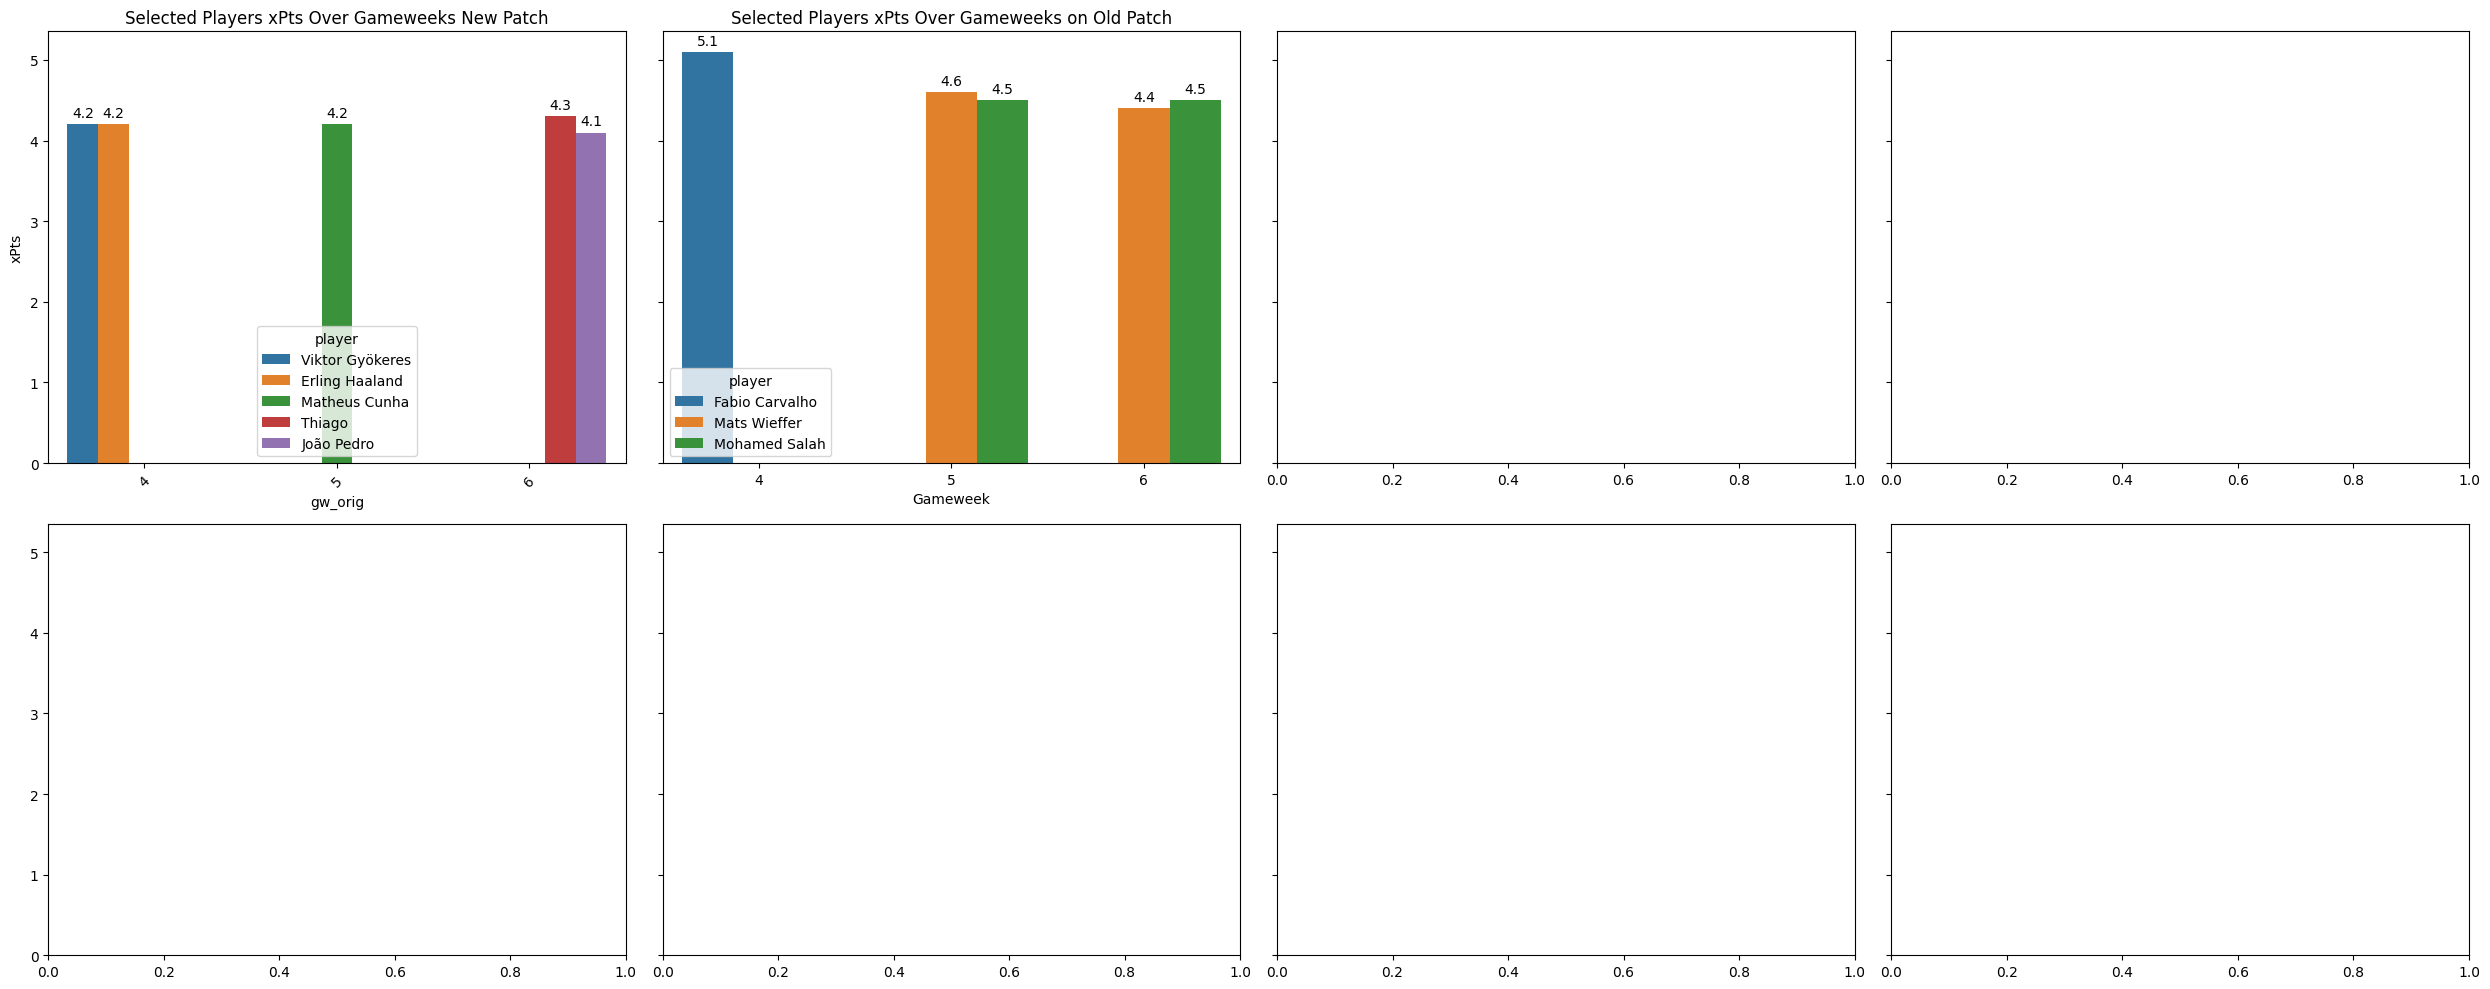

In [13]:
import pandas as pd, numpy as np, pathlib as p

root = p.Path("../data/predictions")
season = "2025-2026"
win = "GW5_7"

MIN = pd.read_csv(root/"minutes"/season/(win+".csv"))
GA  = pd.read_csv(root/"saves"/season/(win+".csv"))
PTS = pd.read_csv(root/"expected_points"/season/(win+".csv"))

key = ["season","gw_orig","team_id","player_id"]

m = (MIN.rename(columns={"fdr":"fdr_min"})[key+["fdr_min"]]
       .merge(GA .rename(columns={"fdr":"fdr_ga"}) [key+["fdr_ga"]], on=key, how="outer")
       .merge(PTS[key+["fdr"]], on=key, how="outer"))

diffs = m[(~m["fdr_min"].isna()) & (~m["fdr_ga"].isna()) & (m["fdr_min"]!=m["fdr_ga"])]
print("FDR disagreements MIN vs GA:", len(diffs))
print(diffs.head(10))
